## Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
sns.set_theme(style='whitegrid')
import random


## generating our own data


In [2]:
X, Y = make_blobs(n_samples=800, n_features=2, centers=2, random_state=9)

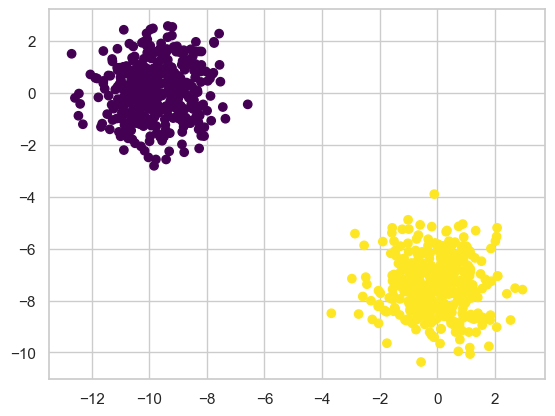

In [3]:
plt.scatter(X[:, [0]], X[:, [1]], c=Y, cmap=plt.cm.viridis)
plt.show()


## defining sigmoid function


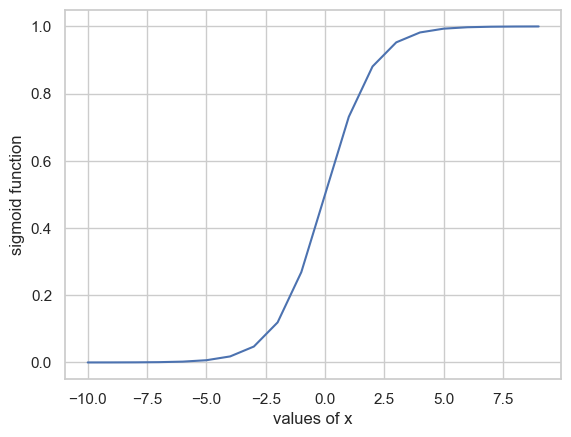

In [4]:
# defining sigmoid function
from cmath import e


def sigmoid(x):
    sgmd = 1/(1+pow(e, -x))
    return sgmd


x = np.arange(-10, 10)

# sigmoid(x)
plt.plot(x, sigmoid(x))
plt.xlabel('values of x')
plt.ylabel('sigmoid function')
plt.show()


In [5]:
Y.shape


(800,)

### Perceptron Learning Algorithm


In [6]:
class perceptron():
    def __init__(self, data, target):
        self.data = data
        self.target = target

    def predictor(self,data,weights):
        y_pred = sigmoid(np.dot(data, weights))
        return y_pred

    def loss(self, data, target, weights):
        y_hat = self.predictor(data,weights)
        loss = np.mean(-target*np.log(y_hat)-(1-target)*np.log(1-y_hat))
        return loss

    def gradient_calculator(self, weights):
        y_hat = self.predictor(self.data,weights)
        # lets calculate gradient
        # derivative w.r.t to weight w(i) will be:-[y_hat-target]*x
        # shape of x-(m,n),shape of y_hat=(m,)
        derivative = np.dot(self.data.T, (y_hat-self.target))
        # print("derivative is ",derivative)
        # print("y_hat is",y_hat)
        # shape_of_derivative-(n,)
        return derivative, y_hat

    def weight_updator(self, target, weights, learning_rate):
        derivative, y_hat = self.gradient_calculator(
            weights)
        denr = self.data.shape[0]
        new_weights = weights-learning_rate*derivative/(float(denr))
        # print("y_pred first two are",derivative[:2])
        # print("y_pred first two are",y_hat[:2])
        # print("updated weights are",new_weights[:2])
        return new_weights
# best_weights=np.zeros(data.shape[1])/float(data.shape[0])

    def train(self, learning_rate=0.5, epoch=500):
        # adding x0 to the data for the bias
        row_of_ones = np.ones((self.data.shape[0], 1))
        self.data = np.hstack((row_of_ones,self.data))
        # print(data[:5])
        # initialising weights
        weights = np.zeros(self.data.shape[1])

        # iterate over all epoch
        loss_list = []
        for epc in range(epoch):
            weights = self.weight_updator(
                target=self.target, weights=weights, learning_rate=learning_rate)
        # now lets print the loss of our function after 5 epoch
            loss_list.append(self.loss(self.data, self.target, weights=weights))
            if(epc % 5 == 0):
                print(
                    f"loss at epoch no {epc} is {self.loss(self.data,self.target,weights=weights)}")
        # now we are getting the best weights we got
        return weights, loss_list

    def predict(self,best_weights,x_test, probab=False):
        # adding the column of ones in the test_data
        onees = np.ones((x_test.shape[0], 1))
        x_test = np.hstack((onees, x_test))
        if(x_test.shape[1] != best_weights.shape[0]):
            print("shape is mismatched")
        # probs == true means that model will return probabilities
        if(probab==True):
           # x_test shape-(m,n+1) weights shape-(n+1,)
            probs=self.predictor(x_test,best_weights)
            return self.predictor(x_test,best_weights)
        else:
            probs=self.predictor(x_test,best_weights)
            label=np.zeros(probs.shape)
            label[probs>=0.5]=1
            return label
            



In [7]:
model = perceptron(X,Y)
best_weights, loss_list = model.train(learning_rate=0.8, epoch=300)


loss at epoch no 0 is 0.0002384528398623671
loss at epoch no 5 is 0.00022999550512380792
loss at epoch no 10 is 0.00022212203113230414
loss at epoch no 15 is 0.00021477395867706712
loss at epoch no 20 is 0.00020790037659222812
loss at epoch no 25 is 0.00020145674240558658
loss at epoch no 30 is 0.00019540391728173755
loss at epoch no 35 is 0.00018970737118906774
loss at epoch no 40 is 0.0001843365242781516
loss at epoch no 45 is 0.00017926419800745258
loss at epoch no 50 is 0.00017446615526728839
loss at epoch no 55 is 0.00016992071311658239
loss at epoch no 60 is 0.00016560841510511904
loss at epoch no 65 is 0.0001615117527571276
loss at epoch no 70 is 0.000157614927824824
loss at epoch no 75 is 0.0001539036485177412
loss at epoch no 80 is 0.0001503649541772399
loss at epoch no 85 is 0.00014698706387068476
loss at epoch no 90 is 0.00014375924518406587
loss at epoch no 95 is 0.00014067170013880897
loss at epoch no 100 is 0.00013771546568185623
loss at epoch no 105 is 0.0001348823266230

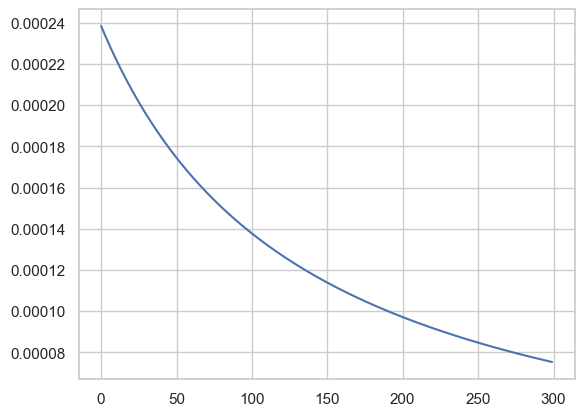

In [8]:
plt.plot(loss_list)

In [9]:
model.predict(x_test=X_test,best_weights=best_weights)

NameError: name 'X_test' is not defined

## plotting the boundary

In [ ]:
x1=np.linspace(-8,2,10)
x2=-(best_weights[0]+best_weights[1]*x1)/best_weights[2]

### lets visualise the effect

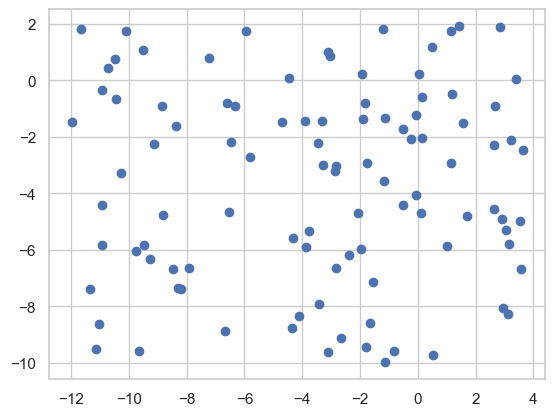

In [ ]:
# lets make the test set
x_pt=np.random.uniform(-12,4,100)
y_pt=np.random.uniform(-10,2,100)


x_pt=np.reshape(x_pt,(x_pt.shape[0],1))
y_pt=np.reshape(y_pt,(y_pt.shape[0],1))
x_test=np.hstack((x_pt,y_pt))
plt.scatter(x_test[:,0],x_test[:,1])


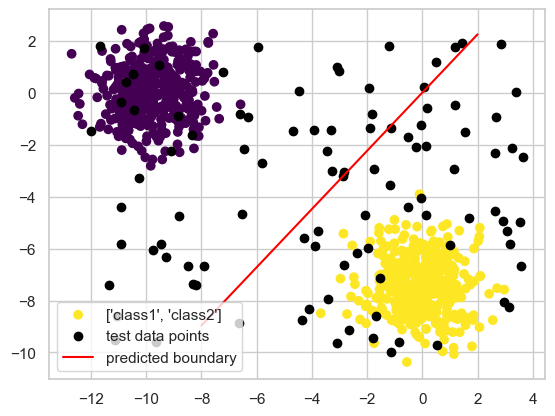

In [ ]:
plt.scatter(X[:, [0]], X[:, [1]], c=Y, cmap=plt.cm.viridis,label='class1')
# plt.legend()
# plt.scatter(X_test[:,0],X_test[:,1],c='red')
# these are the points that are used for test
plt.scatter(x_test[:,[0]],x_test[:,[1]],c='black',label='test data points')
plt.plot(x1,x2,c='red',label="predicted boundary")
plt.legend()
plt.show()
# this is the line that our algorithm has learnt


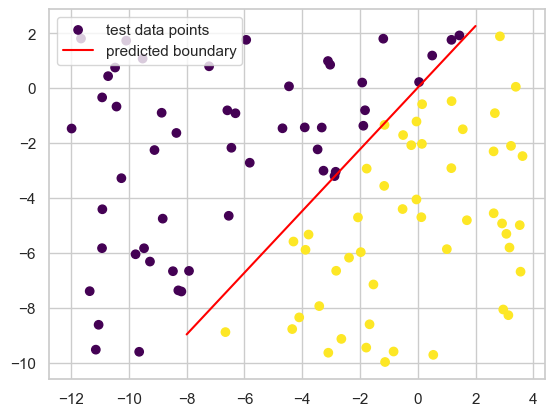

In [ ]:
# lets feed the model our test data and based on the predicted values we will visualise the output
y_pred=model.predict(x_test=x_test,best_weights=best_weights)
# plt.scatter(X[:, [0]], X[:, [1]], c=Y, cmap=plt.cm.viridis,label='class1')
plt.scatter(x_test[:,[0]],x_test[:,[1]],c=y_pred,label='test data points',cmap=plt.cm.viridis)
plt.plot(x1,x2,c='red',label="predicted boundary")
plt.legend()
plt.show()
